## Intro to Time Series

Forecasting is the process of making predictions based on past and present data. Good forecasts capture the genuine patterns and relationships which exist in the historical data, but do not replicate past events that will not occur again.

There is a difference between a **random fluctuation** and a **genuine pattern** that should be modelled and extrapolated.

#### Time series graphics
The first thing we shoud do in quantitative forecasting is understand the data. This can be done with exploration analysis.
We should look for:
1. Patterns
2. Unusual observations
2. Changes over time
4. Relationships between variables.

#### Time Series Patterns

1. Trend: Long term increase or decrease, does not have to be linear.
2. Seasonal: The series is affected by a seasonal pattern, like fridays on beer consumption.
3. Cyclical: Rises and falls on a that are not of a fixed frequency.

Patterns help us build good models.

In [5]:
# libraries needes for case studies
import pandas as pd # Pandas is the python library for working with and visualizing time series
import numpy as np # Numpy is a library for matricial operations and high-level mathematical functions
import matplotlib.pyplot as plt # Matplot lib is the basic python graphic library
import seaborn as sns # Seaborn a graphic library focused on pandas dataframe and based on matplotlib
import plotly.express as px # Plotly is graphic library to make interact plots using java
import scipy.stats as stats # scipy statistical module, it has distributions and relevant stats functions
import statsmodels.api as sm # statistical models library, it has good models implementation, like logit and OLS
import pyreadr # for reading different data types, including r data

# Global parameters for plt graphics
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [10,6]

### Time series regression models
Time series can be thought as a list of numbers indexed by time.

The basic idea of regression is that we try to **explain** a time series $y$ assuming a linear relationship with another time series $x$.

For example we might try to forecast the GDP $y$ using employment $X_1$ and interest rate $X_2$

True Intercept: 10	 True Linear Coef: 0.5
Est. Intercept: 9.48	 Est. Linear Coef: 0.50


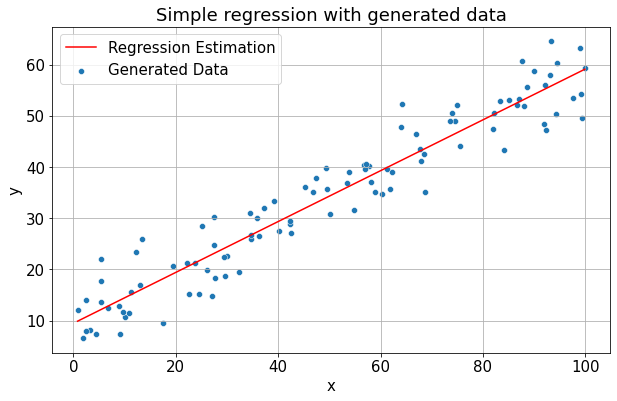

In [6]:
# artificial example for linear regression
x = stats.uniform.rvs(0,100,size = 100) # x is sample from a uniform distribuiton
error = stats.norm.rvs(0,5, size = 100) # error has a normal distribution in our case
b0 = 10
b1 = 0.5
# generating predictable variable
y = b0 + b1*x + error

## Crating Ordinary Least Squares (OLS) model
X = sm.add_constant(x)
model = sm.OLS(y,X)
result_model = model.fit()
# predicting results
y_pred = result_model.predict(X)

# Transforming it all on da Data Frame
generated_data = pd.DataFrame(np.array([x,y,y_pred]).T, columns = ['x','y','y_pred'])

# Ploting the regression
sns.scatterplot(data = generated_data, x = 'x', y = 'y', label = 'Generated Data')
sns.lineplot(data = generated_data, x = 'x', y = 'y_pred',color = 'r', label = 'Regression Estimation')
plt.title('Simple regression with generated data')
plt.grid();

# Comparing the true values ans their estimations
print(f'True Intercept: {b0}\t True Linear Coef: {b1}')
b0_est, b1_est = result_model.params
print(f'Est. Intercept: {b0_est:.2f}\t Est. Linear Coef: {b1_est:.2f}')


### Example: US consumption expenditure

The plot below shows time series of quarterly percentage changes (growth rates) of real personal consumption expenditure, $y$, and real personal disposable income, $x$, for the US from 1970 Q1 to 2016 Q3.

In [7]:
# Reading Data
rdata = pyreadr.read_r(r"data/uschange.rda")
uschange_data = rdata['uschange']

# generating time index and indexing data
quarters = pd.date_range('1970', periods=len(uschange_data), freq = 'Q')
uschange_data.index = quarters
print(uschange_data.head(6))
px.line(uschange_data,x = uschange_data.index, y =  ['Consumption'], 
        title = 'US real personal consumption expenditure and real personal disposable income changes')


            Consumption    Income  Production   Savings  Unemployment
1970-03-31     0.615986  0.972261   -2.452700  4.810312           0.9
1970-06-30     0.460376  1.169085   -0.551525  7.287992           0.5
1970-09-30     0.876791  1.553271   -0.358708  7.289013           0.5
1970-12-31    -0.274245 -0.255272   -2.185455  0.985230           0.7
1971-03-31     1.897371  1.987154    1.909734  3.657771          -0.1
1971-06-30     0.911993  1.447334    0.901536  6.051342          -0.1


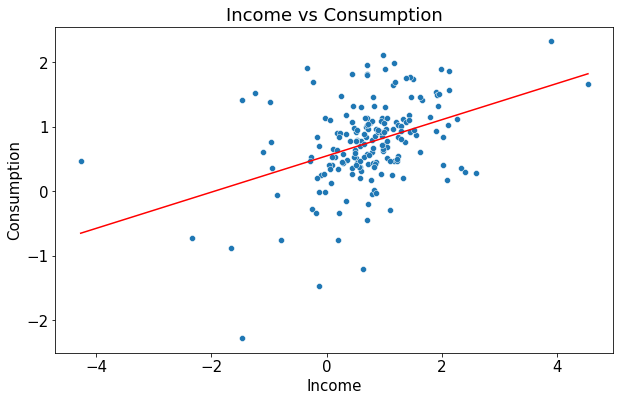

In [8]:
X = sm.add_constant(uschange_data.loc[:,['Income']].to_numpy())
model = sm.OLS(uschange_data['Consumption'].to_numpy(),X)
result_model = model.fit()
y_pred = result_model.predict(X)

sns.lineplot(data = uschange_data, x = 'Income', y = y_pred, color = 'r')
sns.scatterplot(data = uschange_data, x = 'Income', y = 'Consumption')
plt.title('Income vs Consumption');

### Least squares estimation

This is a usual method in statistics, we try to explain the target variable by linking it with another set of variables using linear parameters. The covariables, the variables $x_{i,t}$ that we use to adjust the model, can have a non-linear relation with the target variable $y_t$ but the parameters have to be linear. This property helps us in building and finding solution for the model, that can be done using linear algebra. The geneal model can be written as:

$$y_t = \beta_0 + \beta_1x_{1,t} + \dots + \beta_kx_{k,t} + \epsilon_t$$

Rearranging the expression, we can calculate the error in each prediction:

$$\epsilon_t = y_t - (\beta_0 + \beta_1x_{1,t} + \dots + \beta_kx_{k,t})$$

But we also can define the squared sum of errors from prediction with given a set of $\beta$ 's:

$$\Sigma_{i=0}^{t} \epsilon_t^2 = \Sigma_{i=0}^{t} (y_t - \beta_0 + \beta_1x_{1,t} + \dots + \beta_kx_{k,t})^2$$

A set of $\beta$ 's can be estimated by minimizing the square of estimation error. We will use the $\hat{\beta_0},\dots,\hat{\beta_k}$ notation for the estimated parameters.

### Adjusting the model
In the US consumption expenditure we have the following model:
$$y_t = \beta_0 + \beta_1x_{1,t} + \beta_2x_{2,t} + \beta_3x_{3,t} + \beta_4x_{4,t} + \epsilon_t$$

Where:
1. $y_t$:     Comsumption, the percentage change in real personal consumption expenditure
2. $x_{1,t}$: Income, the percentage change in real personal disposable income  
3. $x_{2,t}$: Production, the percentage change in industrial production   
4. $x_{3,t}$: Savings, the percentage change in personal savings
5. $x_{4,t}$: Unemployment, the change in the unemployment rate

['Income', 'Production', 'Savings', 'Unemployment']
R2: 0.749	STDResid: 0.3286	Y_var: 0.3221
['Income', 'Production', 'Savings']
R2: 0.745	STDResid: 0.3311	Y_var: 0.3199
['Income', 'Production', 'Unemployment']
R2: 0.386	STDResid: 0.5137	Y_var: 0.1689
['Income', 'Savings', 'Unemployment']
R2: 0.746	STDResid: 0.3305	Y_var: 0.3203
['Production', 'Savings', 'Unemployment']
R2: 0.356	STDResid: 0.5259	Y_var: 0.1565
['Income', 'Production']
R2: 0.359	STDResid: 0.5248	Y_var: 0.1561
['Income', 'Savings']
R2: 0.716	STDResid: 0.3490	Y_var: 0.3073
['Income', 'Unemployment']
R2: 0.365	STDResid: 0.5223	Y_var: 0.1587
['Production', 'Savings']
R2: 0.334	STDResid: 0.5350	Y_var: 0.1455
['Production', 'Unemployment']
R2: 0.324	STDResid: 0.5388	Y_var: 0.1415
['Savings', 'Unemployment']
R2: 0.318	STDResid: 0.5413	Y_var: 0.1389
['Income']
R2: 0.154	STDResid: 0.6026	Y_var: 0.0679
['Production']
R2: 0.296	STDResid: 0.5500	Y_var: 0.1280
['Savings']
R2: 0.052	STDResid: 0.6379	Y_var: 0.0246
['Unemployment']
R2:

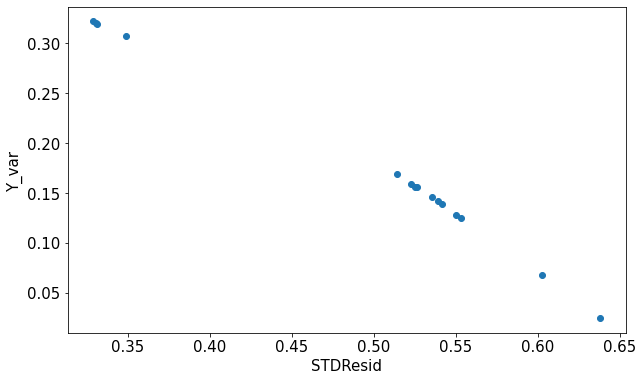

In [92]:
# estimating all possible scenarios
from itertools import combinations
comb = []
for i in range(4,0,-1):
    tup_list = list(combinations(['Income', 'Production', 'Savings', 'Unemployment'],i))
    for tup in tup_list:
        comb.append(list(tup))

def ols_model(lista):
    y = uschange_data.iloc[:,0].to_numpy()
    X = uschange_data.loc[:,lista].to_numpy()
    X = sm.add_constant(X)

    model = sm.OLS(endog = y, exog = X)
    result_model = model.fit()
    return result_model

models = []
for lista in comb:
    result = ols_model(lista)
    models.append(result)
    
xs = []
for lista in comb:
    X = uschange_data.loc[:,lista].to_numpy()
    X = sm.add_constant(X)
    xs.append(X)

ster = []
yvar = []
for i,model in enumerate(models):
    print(comb[i])
    resid = model.resid
    stderror_resid = ((resid**2).sum() / (len(resid) - len(comb[i]) - 1))**(1/2)
    
    y_hat = model.predict(xs[i])
    print(f'R2: {model.rsquared_adj:.3f}\tSTDResid: {stderror_resid:.4f}\tY_var: {y_hat.var():.4f}')
    ster.append(stderror_resid)
    yvar.append(y_hat.var())

plt.scatter(ster,yvar);
plt.xlabel('STDResid');
plt.ylabel('Y_var');

In [18]:
# Adjusting the model
y = uschange_data.iloc[:,0].to_numpy()
X = uschange_data.loc[:,['Income', 'Production', 'Savings', 'Unemployment']].to_numpy()
X = sm.add_constant(X)

model = sm.OLS(endog = y, exog = X)
result_model = model.fit()
# print(result_model.summary())

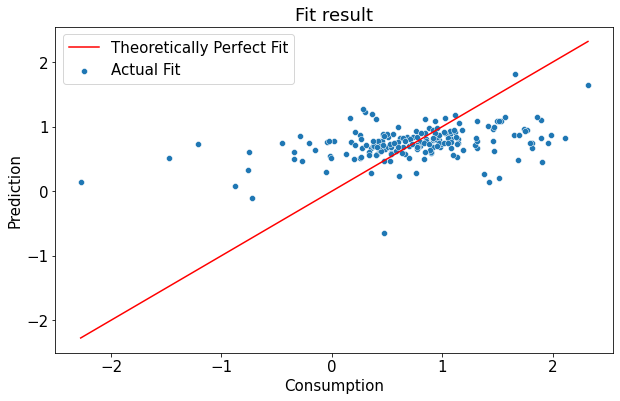

In [10]:
# Fit results plot
comparative_data = pd.DataFrame(np.array([y,y_pred]).T, columns = ['Consumption', 'Prediction'], index = quarters)

x_line = np.linspace(comparative_data['Consumption'].max(),comparative_data['Consumption'].min(), 10)
sns.scatterplot(data = comparative_data,x = 'Consumption',y = 'Prediction', label = 'Actual Fit')
plt.plot(x_line,x_line, color = 'red', label = 'Theoretically Perfect Fit')
plt.title('Fit result')
plt.legend();
px.line(comparative_data,x = uschange_data.index, y =  ['Consumption', 'Prediction'], 
        title = 'US real personal consumption expenditure prediction')

In [19]:
# Model Interpretation
print(result_model.summary())

y_pred = result_model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     139.5
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.62e-54
Time:                        10:06:13   Log-Likelihood:                -54.692
No. Observations:                 187   AIC:                             119.4
Df Residuals:                     182   BIC:                             135.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2673      0.037      7.184      0.0

There is a lot of information on a regression summary. 

First things first, **does the model predict something**?

We can calculate the proportion of $y$ that is explained by the combination of variables and the proportion that is resildual.
$$F = \frac{MS_{regression}}{MS_{residuals}}$$

MS stands for Mean Squares. The higher the F statistic more of the target variable is explained by the model. We estimate the probability of F being equals zero, the lower the prob more certainty we can have that our model can predict something.
With Prob (F-statistic) virtually equals 0, our model can actually predict something.

Second, how **good is our model**?

We can see it by the proportion of the 
$$R^2 = \frac{SS_{regression}}{SS_{Total}} = \frac{\Sigma(\hat{y_i} - \bar{y})^2}{\Sigma(y_i - \bar{y})^2}$$

SS stands for Sum of Squares. The proportion of squared deviation from the mean of our estimation and the real proportionThis values is always positive and between 0 and 1. I f we add new variables, the $R^2$ will always rise, but we lose precision on predition, so we need to 'punish' additions that don't aggregate to the model using the **adjusted** $R^2$. Our model generates the adjusted $R^2 = 0.75$, with is a high value, so we are quite good in predicting the Consumption.

But can we predict the model using less information? Using less variables?
We acan analyse each coefficient sepparetely: In effect, each coef is a estimation, with each observation we can estimate differente coefs, theoretcally if we do a lot of estimations the estimated value will have some variability, calculated by the standart error of each coefficient. The proportion of the estimated value and its variability is the t statistic. If this proportion is equals to zero than the coef can actually be irrelevant, the probability of t being 0 is the P>|t|. Production and Unemployment can be irrelevant in our estimation.

Third, **how does my model make mistakes?**

What I mean with this question is that this is data science, nothing is perfect, we make models for educated guests and those guests have a probability of being wrong. The problem is: is my error acceptable, is the model making mistakes *systematically*.

Those errors I am referring to are called residuals in statistics. One measure of how well the model has fitted the data is the standard deviation of the residuals, which is often known as the “residual standard error.”
$$\hat{\sigma}_e = \sqrt{\frac{1}{n - k - 1} \Sigma e^2_t}$$

Where $n$ is the numbers of observations and $k$ the number of predictors in the model.

The standard error is related to the size of the average error that the model produces. We can compare this error to the sample mean of y or with the standard deviation of y to gain some perspective on the accuracy of the model.

The residual analysis and the analysis on the model assumptions will be in the section below.

### Evaluating the model
After selecting the regression variables and fitting a regression model, it is necessary to plot the residuals to check that the *assumptions* of the model have been satisfied. The assumptions of the model are very important. For a mathematical model to be correct we have to guarantee that the assumptions are correct. The assumptions are the bulding blocks for modelling. If we those blocks lack integridy qe can't guarantee that the building will stand up.

There are a series of plots that should be produced in order to check different aspects of the fitted model and the underlying assumptions.

(array([ 3.,  9., 17., 58., 57., 21., 12.,  6.,  1.,  3.]),
 array([-0.8829595 , -0.67411099, -0.46526248, -0.25641397, -0.04756546,
         0.16128305,  0.37013156,  0.57898007,  0.78782859,  0.9966771 ,
         1.20552561]),
 <a list of 10 Patch objects>)

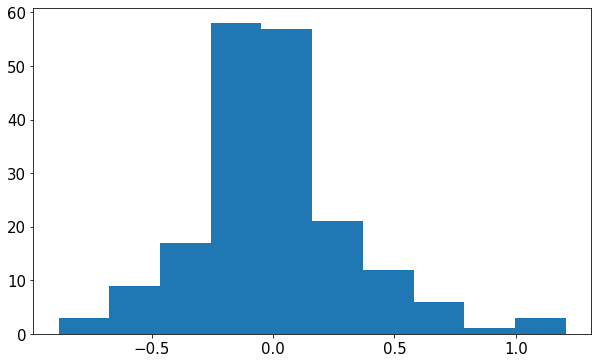

In [103]:
plt.hist(resid)

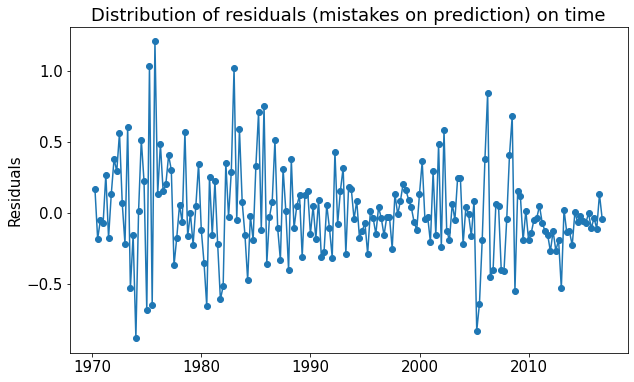

One interesting property of the residuals is that they sum is equals 0
Residuals Sum: -0.00000000


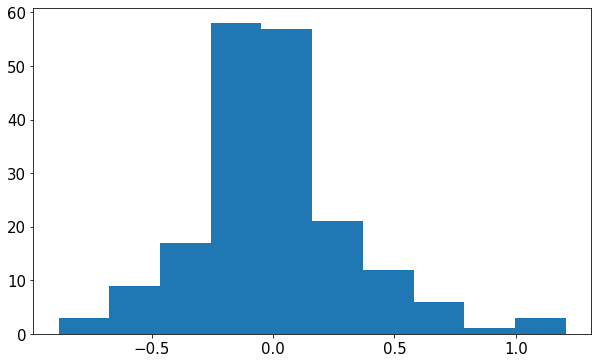

In [106]:
## analysing rediduals
resid = result_model.resid
stderror_resid = ((resid**2).sum() / (len(resid) - len(comb[i]) - 1))**(1/2)

## distribution of residuals in time
plt.plot(quarters,resid, marker = 'o')
plt.title('Distribution of residuals (mistakes on prediction) on time')
plt.ylabel('Residuals')
plt.show()
print(f'One interesting property of the residuals is that they sum is equals 0')
print(f'Residuals Sum: {resid.sum():.8f}')

# ## distribution of residuals
plt.hist(resid);

#### Autocorrelation

With time series data, it is highly likely that the value of a variable observed in the current time period will be similar to its value in the previous period, or even the period before that, and so on. Therefore when fitting a regression model to time series data, it is common to find autocorrelation in the residuals. 

So, if the true *consumption* value in $t-1$ influences the value in $t$ and our model don't account that, the error we made in a previous observation is corralated with a error in the next observation, so we are sistematically making prediction mistakes.

In this case, the estimated model violates the assumption of no autocorrelation in the errors, and our forecasts may be inefficient — there is some information left over which should be accounted for in the model in order to obtain better forecasts. The forecasts from a model with autocorrelated errors are still unbiased, and so are not “wrong,” but they will usually have larger prediction intervals than they need to because the standart errors are effected.

In autocorrelation case we can see its effect in a **Auto Correlation Function** plot, or **ACF plot**. 

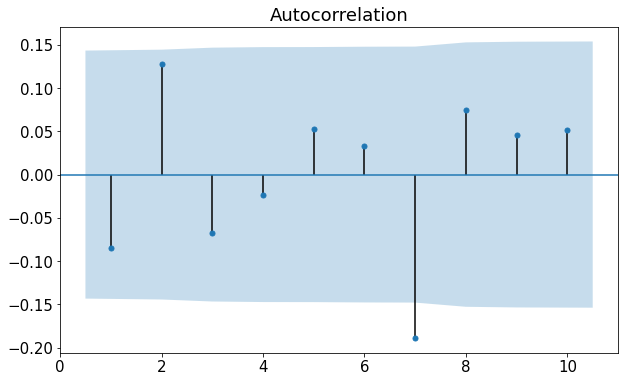

In [129]:
## ACF plot
sm.graphics.tsa.plot_acf(resid, lags=range(1,11));

The ACF plot presents autocorrelation coefficients and the confidence intervals (blue area). If the autocorrelation coefficient is in the confidence interval, it is regarded as not statistically significant. In this case, the lag 7 correlation is statistically significant. It is to say that the value observed 7 quarters ago is related to the present value.

The null Hypothesis is that there is no autocorrelation for any lag tested

$$H_0 = \{\rho_i = 0 \text{ for all } i\}$$


In [154]:
# null
lagrange_stat, ls_pval, fval, f_pval = sm.stats.diagnostic.acorr_breusch_godfrey(result_model, nlags = 8)

print(f'Test p-value: {ls_pval:.2f}')

Test p-value: 0.06


The time plot shows some changing variation over time, but is otherwise relatively unremarkable. This heteroscedasticity will potentially make the prediction interval coverage inaccurate.

The histogram shows that the residuals seem to be slightly skewed, which may also affect the coverage probability of the prediction intervals.

The autocorrelation plot shows a significant spike at lag 7, but it is not quite enough for the Breusch-Godfrey to be significant at the 5% level. In any case, the autocorrelation is not particularly large, and at lag 7 it is unlikely to have any noticeable impact on the forecasts or the prediction intervals.